In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot
from wordcloud import WordCloud, STOPWORDS
import os
import plotly.express as px
import string

In [2]:
df = pd.read_csv('UScomments.csv', on_bad_lines='skip')
df

C:\Users\szige\AppData\Local\Temp\ipykernel_27884\2616256573.py:1: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [3]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [6]:
TextBlob("So pretty").sentiment

Sentiment(polarity=0.25, subjectivity=1.0)

In [7]:
polarities = []
for comment in df['comment_text']:
    try:
        polarities.append(TextBlob(comment).sentiment.polarity)
    except:
        print('helo')
        polarities.append(0)

In [8]:
df['polarity'] = polarities

In [9]:
filter1 = df['polarity'] == 1

In [10]:
df_positive = df[filter1].copy()

In [11]:
filter2 = df['polarity'] == -1

In [12]:
df_negative = df[filter2].copy()

In [13]:
df_positive

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [14]:
comments_positive = ' '.join(df_positive['comment_text'])
comments_negative = ' '.join(df_negative['comment_text'])

### The most used positive words in the comments

(-0.5, 399.5, 199.5, -0.5)

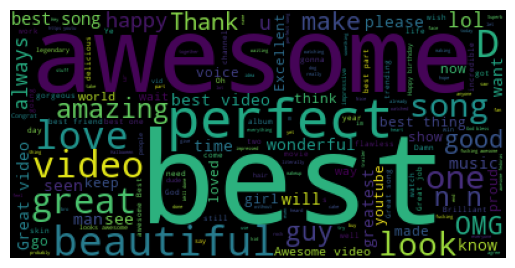

In [15]:
wordcloud = WordCloud(stopwords=set(STOPWORDS))
wordcloud_positive = wordcloud.generate(comments_positive)
plt.imshow(wordcloud_positive)
plt.axis('off')

### The most used negative words in the comments

(-0.5, 399.5, 199.5, -0.5)

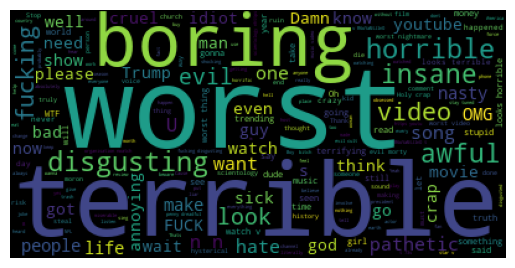

In [16]:
wordcloud_negative = wordcloud.generate(comments_negative)
plt.imshow(wordcloud_negative)
plt.axis('off')

In [17]:
emojis = [char for char in ' '.join(df['comment_text']) if char in emoji.EMOJI_DATA]
top = 10
top_emojis = Counter(emojis).most_common(top)
top_emojis_keys = [top_emojis[i][0] for i in range(top)]
top_emojis_values = [top_emojis[i][1] for i in range(top)]

In [18]:
trace = go.Bar(x=top_emojis_keys, y=top_emojis_values)
iplot([trace])

In [19]:
folder = 'additional_data'
files = os.listdir(folder)
csv_files = [file for file in files if '.csv' in file]
big_df = pd.DataFrame()
for file in csv_files:
    path = os.path.join(folder, file)
    temp_df = pd.read_csv(path, on_bad_lines='skip', encoding='iso-8859-1')
    big_df = pd.concat([big_df,temp_df],ignore_index=True)
rows_before_removing = big_df.shape[0]
rows_before_removing

375942

In [20]:
big_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [21]:
big_df.drop_duplicates(inplace=True)
rows_after_removing = big_df.shape[0]
print('Duplicated rows deleted: ', rows_before_removing-rows_after_removing)

Duplicated rows deleted:  36417


In [22]:
category_ids = big_df['category_id'].unique()
category_ids

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [23]:
json_df = pd.read_json(os.path.join(folder, 'CA_category_id.json'))
cat_dict = {}
for item in json_df['items'].values:
     cat_dict[int(item['id'])] = item['snippet']['title']
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [24]:
big_df['category']= big_df['category_id'].map(cat_dict)

In [25]:
big_df.describe()

,category_id,views,likes,dislikes,comment_count
count,339525.000000,3.395250e+05,3.395250e+05,3.395250e+05,3.395250e+05
mean,20.307621,1.226880e+06,3.454187e+04,2.011961e+03,3.867019e+03
std,7.073171,7.070301e+06,1.528666e+05,2.322992e+04,2.345294e+04
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,4.173200e+04,6.040000e+02,3.700000e+01,9.800000e+01
50%,23.000000,1.543520e+05,3.083000e+03,1.580000e+02,4.630000e+02
75%,24.000000,5.554050e+05,1.542400e+04,6.580000e+02,1.799000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Pets & Animals'),
  Text(11, 0, 'Travel & Events'),
  Text(12, 0, 'Autos & Vehicles'),
  Text(13, 0, 'Education'),
  Text(14, 0, 'Shows'),
  Text(15, 0, 'Movies'),
  Text(16, 0, 'Trailers')])

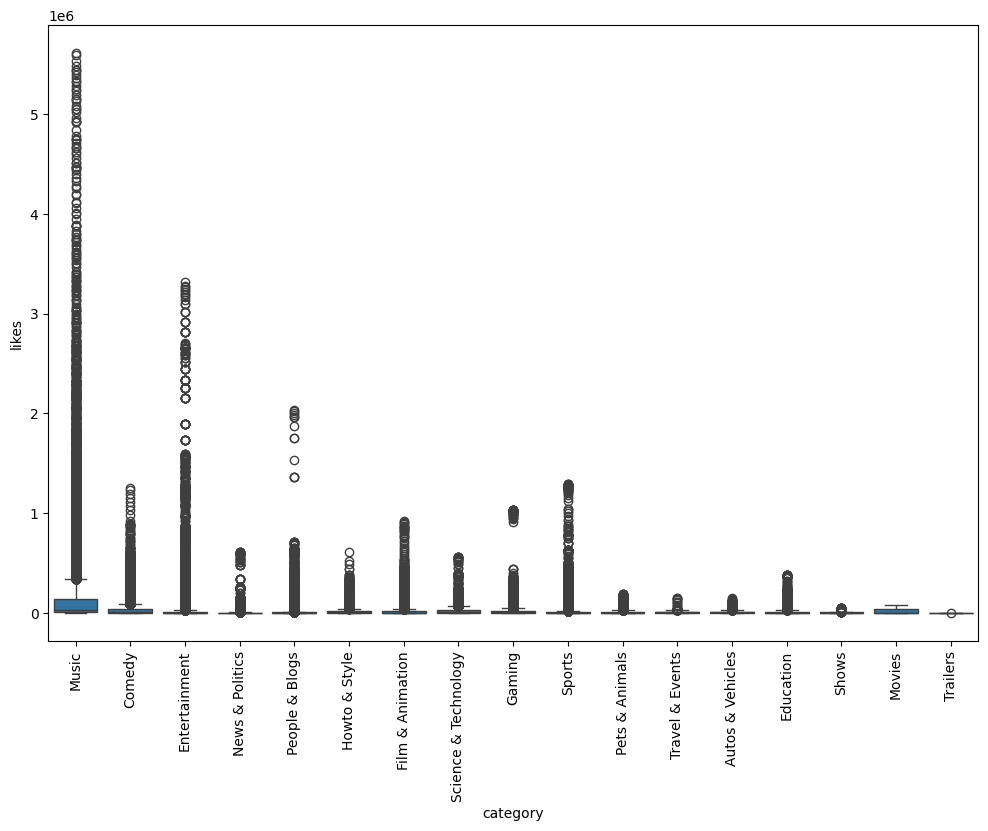

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category', y='likes', data=big_df)
plt.xticks(rotation='vertical')

In [46]:
big_df['like_rate'] = (big_df['likes'] / big_df['views']) * 100
big_df['Like_dislike_rate'] = (big_df['likes'] / big_df['dislikes']) * 100
big_df['comment_count_rate'] = (big_df['comment_count'] / big_df['views']) * 100
big_df['dislike_rate'] = (big_df['dislikes'] / big_df['views']) * 100

In [43]:
big_df[big_df['video_id'].isin(df['video_id'])]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,Like / View,Like / Dislike,Comment / View
20024,J5b_-TZwQ0I,18.24.02,Confederacy: Last Week Tonight with John Olive...,LastWeekTonight,24,2017-10-09T06:30:01.000Z,"last week tonight confederacy|""john oliver con...",7256002,154112,12940,29447,https://i.ytimg.com/vi/J5b_-TZwQ0I/default.jpg,False,False,False,Confederate symbols are still celebrated despi...,Entertainment,0.021239,11.909737,0.004058
20230,J5b_-TZwQ0I,18.25.02,Confederacy: Last Week Tonight with John Olive...,LastWeekTonight,24,2017-10-09T06:30:01.000Z,"last week tonight confederacy|""john oliver con...",7283821,154518,12949,29499,https://i.ytimg.com/vi/J5b_-TZwQ0I/default.jpg,False,False,False,Confederate symbols are still celebrated despi...,Entertainment,0.021214,11.932813,0.004050
20497,J5b_-TZwQ0I,18.26.02,Confederacy: Last Week Tonight with John Olive...,LastWeekTonight,24,2017-10-09T06:30:01.000Z,"last week tonight confederacy|""john oliver con...",7316184,154985,12973,29590,https://i.ytimg.com/vi/J5b_-TZwQ0I/default.jpg,False,False,False,Confederate symbols are still celebrated despi...,Entertainment,0.021184,11.946736,0.004044


### There are only 3 common videos in the 2 datasets, I wanted to include the polarity value here aswell

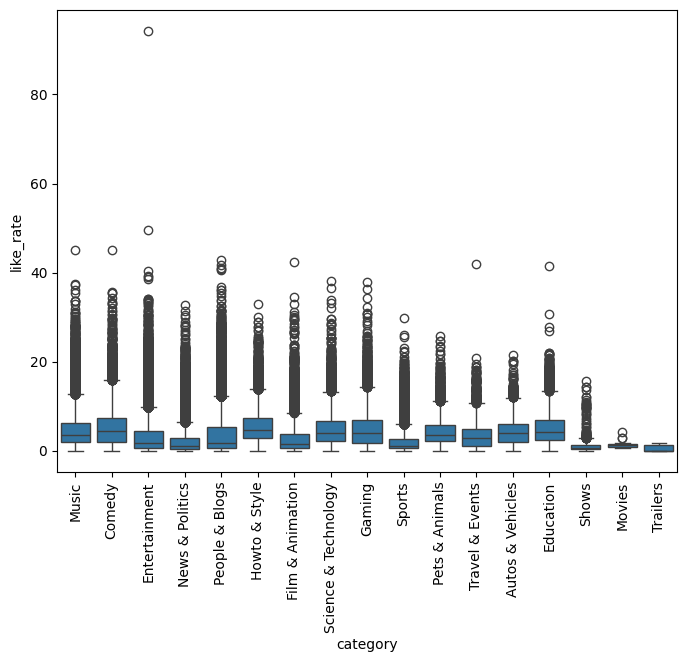

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category', y='like_rate', data=big_df)
plt.xticks(rotation='vertical')
plt.show()

### Correlation between likes and views with a regression plot

<Axes: xlabel='views', ylabel='likes'>

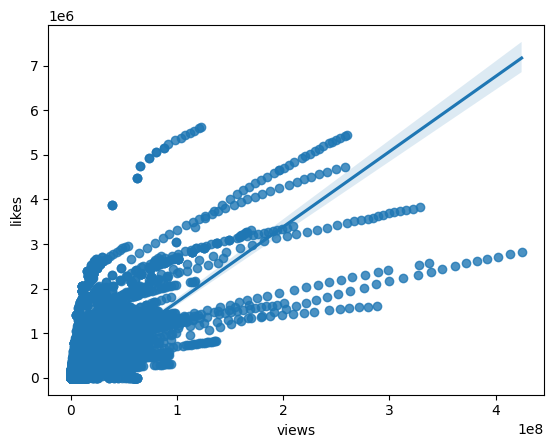

In [49]:
sns.regplot(x='views', y='likes', data=big_df)

In [50]:
big_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'Like / View',
       'Like / Dislike', 'Comment / View', 'Dislike / View', 'like_rate',
       'Like_dislike_rate', 'comment_count_rate', 'dislike_rate'],
      dtype='object')

### Check the correlations between the most important datas

In [55]:
correlations = big_df[['views', 'likes', 'dislikes', 'comment_count']].corr()

<Axes: >

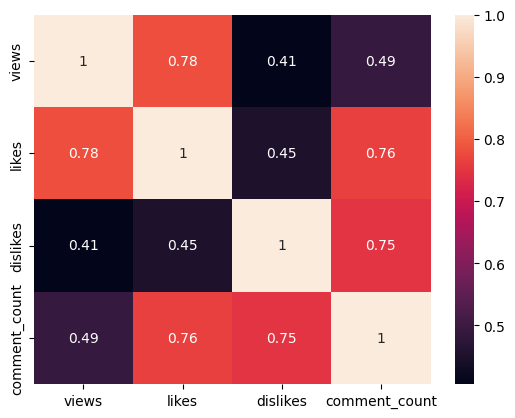

In [57]:
sns.heatmap(correlations, annot=True)

In [59]:
big_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

In [68]:
cdf = big_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf.rename(columns={0:'total_videos'}, inplace=True)
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [83]:
px.bar(data_frame=cdf[:20], x='channel_title', y='total_videos', title='Channels with the most trending videos')

In [76]:
def punctuation_count(text: str) -> int:
    return len([char for char in text if char in string.punctuation])

In [78]:
big_df['punctuation_count']=big_df['title'].apply(punctuation_count)

<Axes: xlabel='views', ylabel='punctuation_count'>

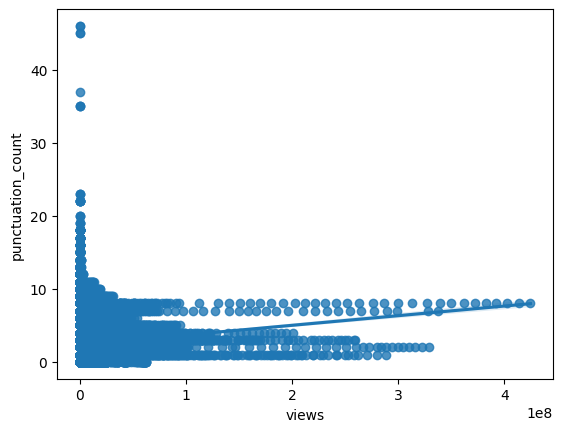

In [80]:
sns.regplot(x='views', y='punctuation_count', data=big_df)

<Axes: >

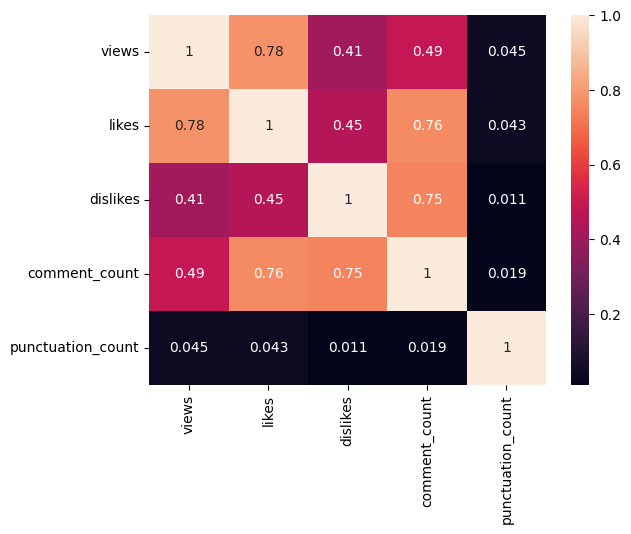

In [82]:
correlations = big_df[['views', 'likes', 'dislikes', 'comment_count', 'punctuation_count']].corr()
sns.heatmap(correlations, annot=True)